In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from jcopml.time_series.decomposition import additive_decomposition
from luwiji.time_series import illustration

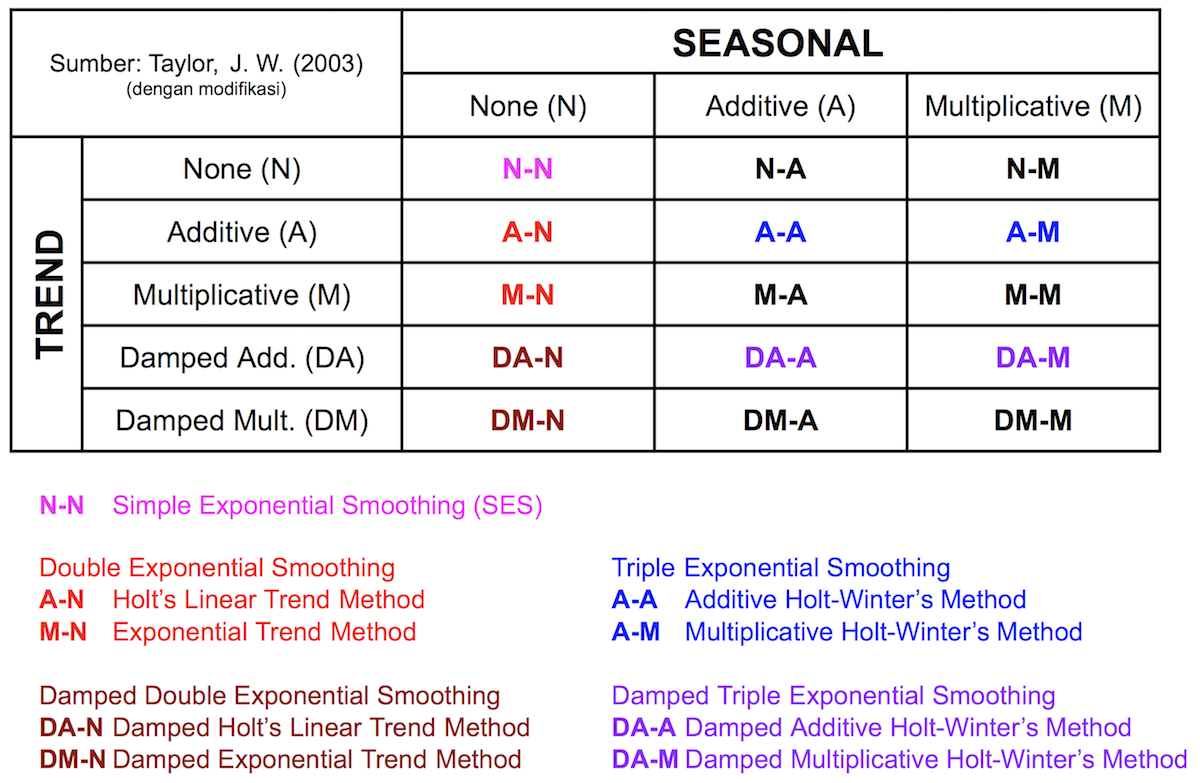

In [2]:
illustration.ets_model

**READ DATA**

In [3]:
df_ori = pd.read_csv("malnutrition.csv")
df_ori.head(10)

,bulan,beresiko
0,01/01/2013,199.0
1,01/02/2013,52.0
2,01/03/2013,84.0
3,01/04/2013,66.0
4,01/05/2013,94.0
5,01/06/2013,NaN
6,01/07/2013,NaN
7,01/08/2013,NaN
8,01/09/2013,NaN
9,01/10/2013,NaN


**TRANSFORMATION & *PRE-PROCESSING***

In [4]:
df_ori.bulan.describe()

count             91
unique            91
top       01/01/2013
freq               1
Name: bulan, dtype: object

In [5]:
df_ori.bulan = pd.to_datetime(df_ori.bulan, dayfirst = True)
df_ori.head()

,bulan,beresiko
0,2013-01-01,199.0
1,2013-02-01,52.0
2,2013-03-01,84.0
3,2013-04-01,66.0
4,2013-05-01,94.0


In [6]:
df_ori.bulan.describe()

C:\Users\taufa\AppData\Local\Temp\ipykernel_8832\601820885.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_ori.bulan.describe()


count                      91
unique                     91
top       2013-01-01 00:00:00
freq                        1
first     2013-01-01 00:00:00
last      2020-07-01 00:00:00
Name: bulan, dtype: object

In [7]:
df_ori.set_index("bulan", inplace=True)
df_ori.head()

,beresiko
bulan,
2013-01-01,199.0
2013-02-01,52.0
2013-03-01,84.0
2013-04-01,66.0
2013-05-01,94.0


Menangani Missing Values

In [8]:
df_ori.isna().sum()

beresiko    5
dtype: int64

In [9]:
df_ori.beresiko = df_ori.beresiko.fillna(method='ffill')
df_ori.isna().sum()

beresiko    0
dtype: int64

In [10]:
df_ori.head(10)

,beresiko
bulan,
2013-01-01,199.0
2013-02-01,52.0
2013-03-01,84.0
2013-04-01,66.0
2013-05-01,94.0
2013-06-01,94.0
2013-07-01,94.0
2013-08-01,94.0
2013-09-01,94.0


In [11]:
df_ori['malnutrition'] = df_ori.beresiko
df_ori.head()

,beresiko,malnutrition
bulan,,
2013-01-01,199.0,199.0
2013-02-01,52.0,52.0
2013-03-01,84.0,84.0
2013-04-01,66.0,66.0
2013-05-01,94.0,94.0


In [12]:
del df_ori['beresiko']
df_ori.head(10)

,malnutrition
bulan,
2013-01-01,199.0
2013-02-01,52.0
2013-03-01,84.0
2013-04-01,66.0
2013-05-01,94.0
2013-06-01,94.0
2013-07-01,94.0
2013-08-01,94.0
2013-09-01,94.0


In [13]:
series = df_ori.malnutrition

**Analisis Model**

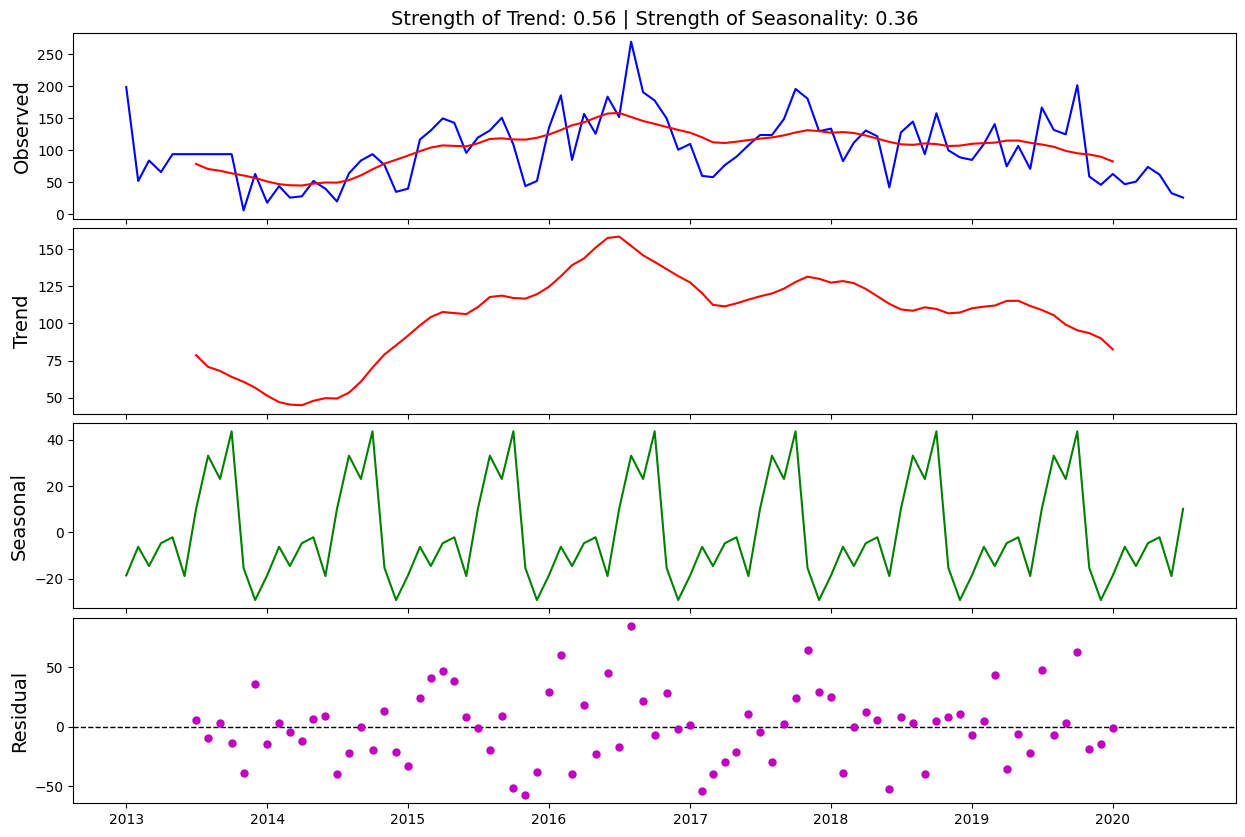

In [14]:
components = additive_decomposition(series, plot=True)

**SPLIT DATA**

<AxesSubplot: xlabel='bulan'>

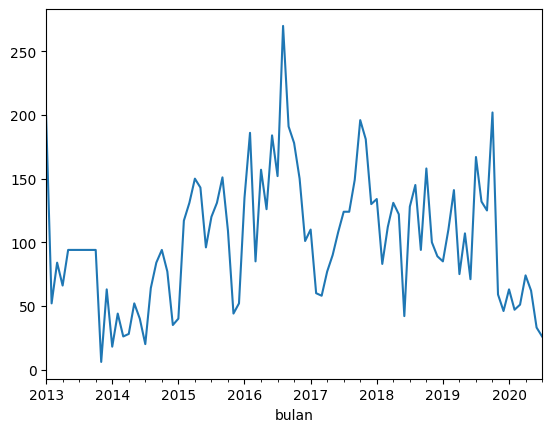

In [15]:
x_train, x_test = series[:-22], series[-22:]
series.plot()

In [16]:
x_train.tail()

bulan
2018-05-01    122.0
2018-06-01     42.0
2018-07-01    128.0
2018-08-01    145.0
2018-09-01     94.0
Name: malnutrition, dtype: float64

**TRAINING DATA**

In [17]:
hw_model = ExponentialSmoothing(x_train, trend="add", seasonal="add", seasonal_periods=12 ).fit(optimized=True)

c:\Users\taufa\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [18]:
test_pred = hw_model.forecast(22)
test_pred.tail()

2020-03-01    48.928208
2020-04-01    68.069094
2020-05-01    70.926510
2020-06-01    60.455630
2020-07-01    73.183030
Freq: MS, dtype: float64

<AxesSubplot: xlabel='bulan'>

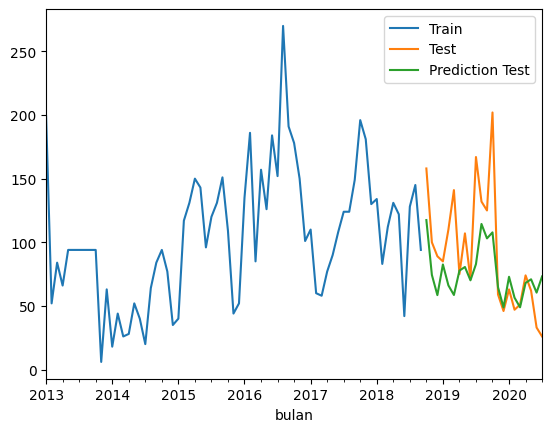

In [19]:
x_train.plot(legend=True, label='Train')
x_test.plot(legend=True, label='Test')
test_pred.plot(legend=True, label='Prediction Test')


**FORECAST**

In [20]:
model = hw_model

In [21]:
len(series)

91

In [22]:
len(x_train)

69

In [23]:
pred = model.predict(len(x_train)-10, len(x_train)+38)

In [24]:
pred.tail(12)

2021-01-01    63.229352
2021-02-01    46.779434
2021-03-01    39.258049
2021-04-01    58.398935
2021-05-01    61.256351
2021-06-01    50.785471
2021-07-01    63.512870
2021-08-01    95.062934
2021-09-01    83.734045
2021-10-01    88.447360
2021-11-01    45.355674
2021-12-01    29.475741
Freq: MS, dtype: float64

In [25]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
import math

print(f'Mean Absolute Error = {mean_absolute_error(x_test,test_pred)}')
print(f'Mean Absolute Percentage Error = {mean_absolute_percentage_error(x_test,test_pred)}')
MSE = np.square(np.subtract(x_test,test_pred)).mean() 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error : ")
print(RMSE)

Mean Absolute Error = 26.942242740410425
Mean Absolute Percentage Error = 0.3122589814971217
Root Mean Square Error : 
38.572578693323166


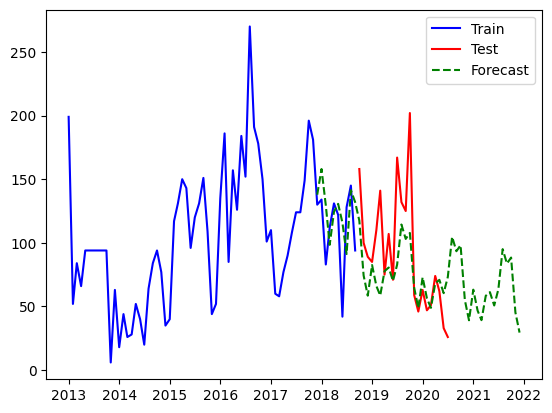

In [26]:
plt.plot(x_train, "b-", label="Train")
plt.plot(x_test, "r-", label="Test")
plt.plot(pred, "g--", label="Forecast")
plt.legend(loc="best")

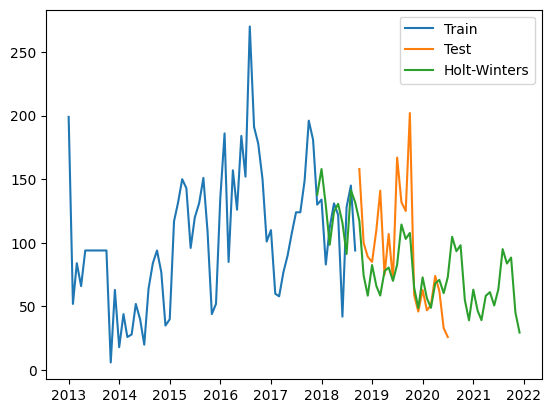

In [27]:
plt.plot(x_train.index, x_train, label='Train')
plt.plot(x_test.index, x_test, label='Test')
plt.plot(pred.index, pred, label='Holt-Winters')
plt.legend(loc='best')

***Confidence Interval***

In [28]:
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
import pandas as pd


# Build model.
ets_model = ETSModel(
    endog=pred,
    trend="add", 
    seasonal="add",
    seasonal_periods=12,
)
ets_result = ets_model.fit()

# Simulate predictions.
n_steps_prediction = pred.shape[0]
n_repetitions = 90

df_simul = ets_result.simulate(
    nsimulations=n_steps_prediction,
    repetitions=n_repetitions,
    anchor='start',
)

# Calculate confidence intervals.
upper_ci = df_simul.quantile(q=1, axis='columns')
lower_ci = df_simul.quantile(q=0, axis='columns')

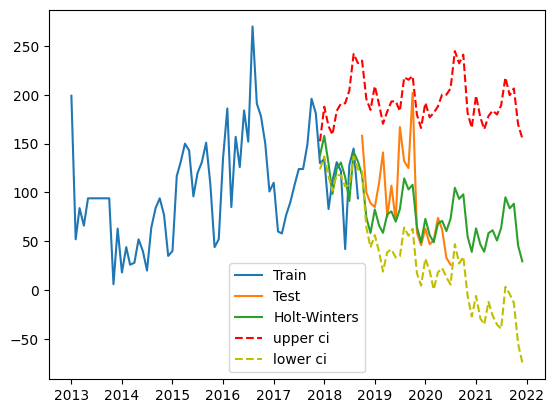

In [29]:
plt.plot(x_train.index, x_train, label='Train')
plt.plot(x_test.index, x_test, label='Test')
plt.plot(pred.index, pred, label='Holt-Winters')
plt.plot(upper_ci.index, upper_ci,"r--", label='upper ci')
plt.plot(lower_ci.index, lower_ci,"y--", label='lower ci')
plt.legend(loc='best')

In [30]:
hasil_prediksi = pd.concat([series, pred, upper_ci, lower_ci], axis=1)

In [31]:
hasil_prediksi.tail(12)

,malnutrition,0,1.0,0.0
2021-01-01,NaN,63.229352,199.110976,-5.965962
2021-02-01,NaN,46.779434,176.930718,-29.084029
2021-03-01,NaN,39.258049,164.754919,-35.073605
2021-04-01,NaN,58.398935,178.279939,-11.934600
2021-05-01,NaN,61.256351,183.858837,-26.248101
2021-06-01,NaN,50.785471,179.828975,-35.255180
2021-07-01,NaN,63.512870,189.192018,-39.708276
2021-08-01,NaN,95.062934,217.682517,3.347485
2021-09-01,NaN,83.734045,199.569421,-4.025938
2021-10-01,NaN,88.447360,206.524805,-13.173115


In [32]:
actual_data = pd.read_csv("actual malnutrition.csv")
actual_data.tail()

,bulan,beresiko
103,01/08/2021,130.0
104,01/09/2021,155.0
105,01/10/2021,126.0
106,01/11/2021,105.0
107,01/12/2021,129.0


In [33]:
actual_data.bulan = pd.to_datetime(actual_data.bulan, dayfirst = True)
actual_data.set_index("bulan", inplace=True)
actual_data.head()

,beresiko
bulan,
2013-01-01,199.0
2013-02-01,52.0
2013-03-01,84.0
2013-04-01,66.0
2013-05-01,94.0


In [34]:
final_pred = pd.concat([actual_data, hasil_prediksi], axis=1)
final_pred.tail(12)

,beresiko,malnutrition,0,1.0,0.0
2021-01-01,7.0,NaN,63.229352,199.110976,-5.965962
2021-02-01,22.0,NaN,46.779434,176.930718,-29.084029
2021-03-01,131.0,NaN,39.258049,164.754919,-35.073605
2021-04-01,193.0,NaN,58.398935,178.279939,-11.934600
2021-05-01,32.0,NaN,61.256351,183.858837,-26.248101
2021-06-01,46.0,NaN,50.785471,179.828975,-35.255180
2021-07-01,79.0,NaN,63.512870,189.192018,-39.708276
2021-08-01,130.0,NaN,95.062934,217.682517,3.347485
2021-09-01,155.0,NaN,83.734045,199.569421,-4.025938
2021-10-01,126.0,NaN,88.447360,206.524805,-13.173115


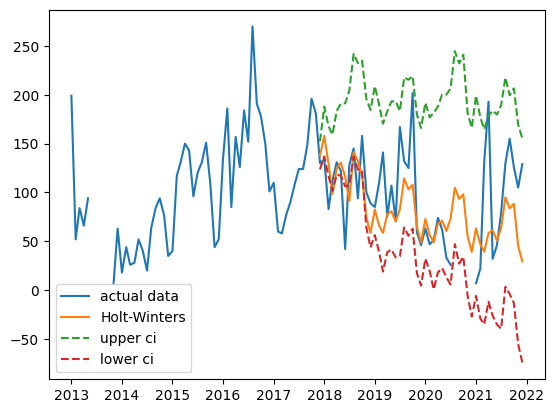

In [35]:
plt.plot(actual_data.index, actual_data, label='actual data')
plt.plot(pred.index, pred, label='Holt-Winters')
plt.plot(upper_ci.index, upper_ci,"--", label='upper ci')
plt.plot(lower_ci.index, lower_ci,"--", label='lower ci')
plt.legend(loc='best')